In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import calendar
import datetime as dt
import datetime
import pickle
import azureml.train.automl
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from math import sqrt
from lifelines.utils import k_fold_cross_validation
from dateutil.relativedelta import relativedelta
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

Duplicate key in file '/Users/at185217/.matplotlib/matplotlibrc' line #2.


In [2]:
df = pd.read_csv('EDL_Train.csv')
df.columns = df.columns.str.replace(r'train_data_t2p.', '')
df['customer_nbr'] = df['customer_nbr'].astype(str)
df['invoice_nbr'] = df['invoice_nbr'].astype(str)
df["ratio_closed_0"] = df["closed_bucket_0"]/df["count_paid_invoices"]
df["ratio_closed_1"] = df["closed_bucket_1"]/df["count_paid_invoices"]
df["ratio_closed_2"] = df["closed_bucket_2"]/df["count_paid_invoices"]
df["ratio_closed_3"] = df["closed_bucket_3"]/df["count_paid_invoices"]
df["ratio_closed_4"] = df["closed_bucket_4"]/df["count_paid_invoices"]
df = df.loc[df['customer_segment'] == 1]
print(df.shape)
print(df.customer_segment.value_counts())

(808209, 100)
1    808209
Name: customer_segment, dtype: int64


In [3]:
# Load Model
filename = 'Survival_Model_EDL_Data.pkl'
model = pickle.load(open(filename, 'rb'))

In [7]:
df2 = df[['country_code','invoice_base_amount','commited_days', 'invoice_category',  'financial_banking_cfi',
            'financial_banking_major', 'financial_channel', 'financial_other_financial_serv','hospitality_channel',
            'hospitality_eating_drinking_qs','hospitality_eating_drinking_ts','hospitality_sports_recreation','retail_channel',
            'retail_cstore_and_petroleum','retail_distribution_wholesale','retail_drug','retail_food_and_mass',
            'retail_public_sector','retail_specialty_retail','t_and_t_technology','tlg_channel',
            'tlg_gaming','tlg_lodging','tlg_travel',
            'month_num_created','day_of_week_created','day_of_month_due','month_num_due','day_of_week_due',
            'ratio_late_paid_amount',
            'ratio_closed_0', 'ratio_closed_1', 'ratio_closed_2', 'ratio_closed_3', 'ratio_closed_4', 
            'hw','sw','swm','hwm','ps','ts','other_category']]

In [18]:
df2.head(10)

,country_code,invoice_base_amount,commited_days,invoice_category,financial_banking_cfi,financial_banking_major,financial_channel,financial_other_financial_serv,hospitality_channel,hospitality_eating_drinking_qs,hospitality_eating_drinking_ts,hospitality_sports_recreation,retail_channel,retail_cstore_and_petroleum,retail_distribution_wholesale,retail_drug,retail_food_and_mass,retail_public_sector,retail_specialty_retail,t_and_t_technology,tlg_channel,tlg_gaming,tlg_lodging,tlg_travel,month_num_created,day_of_week_created,day_of_month_due,month_num_due,day_of_week_due,ratio_late_paid_amount,ratio_closed_0,ratio_closed_1,ratio_closed_2,ratio_closed_3,ratio_closed_4,hw,sw,swm,hwm,ps,ts,other_category
0,1,511.000,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4.000,17,6,0.000,0.470,0.535,0.465,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,1,365.230,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1.000,15,11,4.000,0.470,0.535,0.465,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
2,1,266.000,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,3.000,13,10,5.000,0.240,0.727,0.182,0.000,0.000,0.091,0.000,0.000,0.000,0.000,0.000,0.000,1.000
3,1,320.000,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2.000,9,8,4.000,0.790,0.600,0.300,0.050,0.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,1,136.000,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000,13,2,2.000,0.420,0.688,0.250,0.062,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
5,1,99.690,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,5.000,28,10,0.000,0.530,0.571,0.333,0.000,0.000,0.095,0.000,0.000,0.000,0.250,0.000,0.000,0.750
6,1,2786.100,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2.000,6,9,4.000,0.530,0.571,0.333,0.000,0.000,0.095,0.170,0.000,0.000,0.000,0.000,0.080,0.750
7,1,268.000,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000,13,2,2.000,0.470,0.700,0.200,0.050,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
8,1,586.000,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.000,13,3,2.000,0.230,0.727,0.273,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
9,1,440.540,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,6.000,10,9,1.000,0.230,0.727,0.273,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


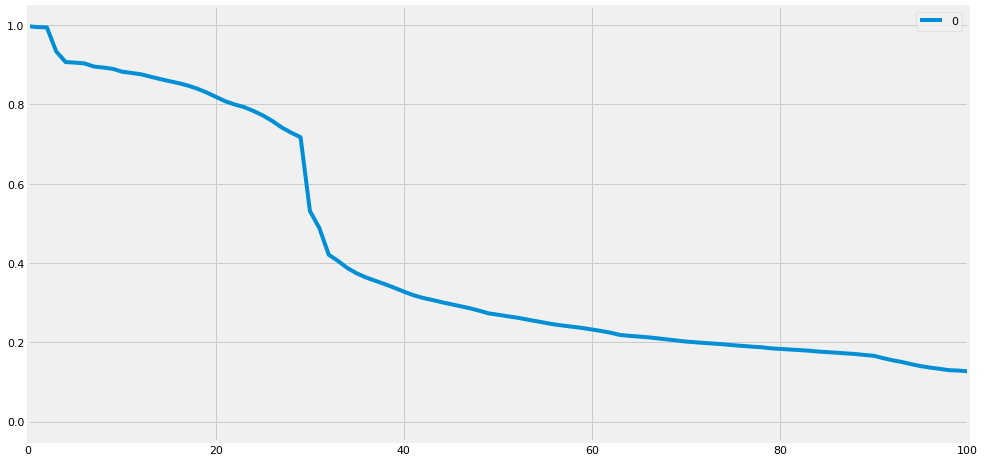

In [30]:
rows = df2.iloc[3:4,:]
rows.reset_index(inplace=True)
model.predict_survival_function(rows).plot(xlim = (0,100), figsize = (15,8))

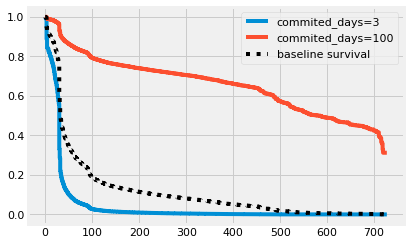

In [28]:
model.plot_covariate_groups(covariates='commited_days',values=(3,100))

In [38]:
a=model.predict_survival_function(rows)
a1=1-a

In [41]:
b= a1.transpose()

In [42]:
b.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,...,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,521.0,522.0,523.0,524.0,525.0,526.0,527.0,528.0,529.0,530.0,531.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,544.0,545.0,546.0,547.0,548.0,549.0,550.0,551.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,561.0,562.0,563.0,564.0,565.0,566.0,567.0,568.0,569.0,570.0,571.0,572.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0,585.0,586.0,587.0,588.0,589.0,590.0,591.0,592.0,593.0,594.0,595.0,596.0,597.0,598.0,599.0,600.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0,611.0,612.0,613.0,614.0,615.0,616.0,617.0,618.0,619.0,620.0,621.0,622.0,623.0,624.0,625.0,626.0,627.0,628.0,629.0,630.0,631.0,632.0,633.0,634.0,635.0,636.0,638.0,639.0,640.0,641.0,642.0,643.0,644.0,645.0,646.0,647.0,648.0,649.0,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0,669.0,670.0,671.0,673.0,675.0,676.0,677.0,678.0,679.0,680.0,682.0,683.0,684.0,685.0,686.0,687.0,689.0,690.0,691.0,692.0,693.0,694.0,697.0,698.0,699.0,700.0,703.0,704.0,705.0,706.0,707.0,708.0,709.0,710.0,711.0,712.0,713.0,714.0,715.0,717.0,718.0,719.0,727.0
0,0.002,0.005,0.005,0.066,0.093,0.094,0.097,0.104,0.107,0.110,0.117,0.121,0.124,0.130,0.136,0.141,0.146,0.152,0.160,0.170,0.181,0.192,0.200,0.207,0.216,0.228,0.242,0.258,0.271,0.283,0.469,0.512,0.579,0.595,0.613,0.626,0.637,0.645,0.654,0.663,0.672,0.681,0.688,0.693,0.699,0.704,0.709,0.714,0.720,0.727,0.730,0.734,0.738,0.742,0.746,0.751,0.755,0.758,0.761,0.764,0.768,0.772,0.776,0.781,0.784,0.785,0.787,0.790,0.793,0.796,0.798,0.800,0.802,0.803,0.805,0.807,0.809,0.811,0.812,0.815,0.817,0.818,0.819,0.821,0.823,0.825,0.826,0.828,0.830,0.832,0.834,0.840,0.845,0.850,0.855,0.860,0.864,0.867,0.870,0.871,0.873,0.875,0.876,0.878,0.879,0.880,0.881,0.882,0.883,0.884,0.885,0.885,0.887,0.888,0.888,0.889,0.890,0.892,0.892,0.893,0.895,0.895,0.896,0.896,0.897,0.898,0.899,0.899,0.900,0.900,0.901,0.903,0.903,0.904,0.905,0.905,0.906,0.906,0.907,0.907,0.908,0.908,0.909,0.909,0.910,0.910,0.911,0.911,0.911,0.912,0.912,0.912,0.913,0.914,0.914,0.914,0.915,0.915,0.915,0.916,0.917,0.917,0.918,0.918,0.918,0.919,0.919,0.920,0.920,0.920,0.920,0.921,0.921,0.921,0.922,0.922,0.922,0.922,0.923,0.924,0.924,0.924,0.925,0.925